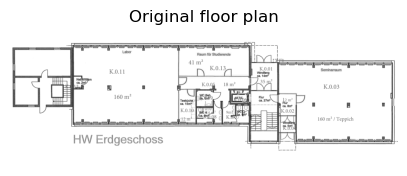

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("data/floor_plan_cropped.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap="gray")
plt.title("Original floor plan")
plt.axis("off")
plt.show()


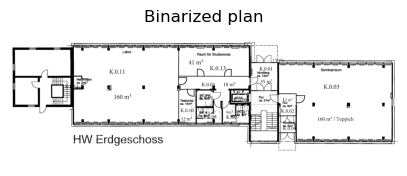

In [2]:
_, bw = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(5, 5))
plt.imshow(bw, cmap="gray")
plt.title("Binarized plan")
plt.axis("off")
plt.show()


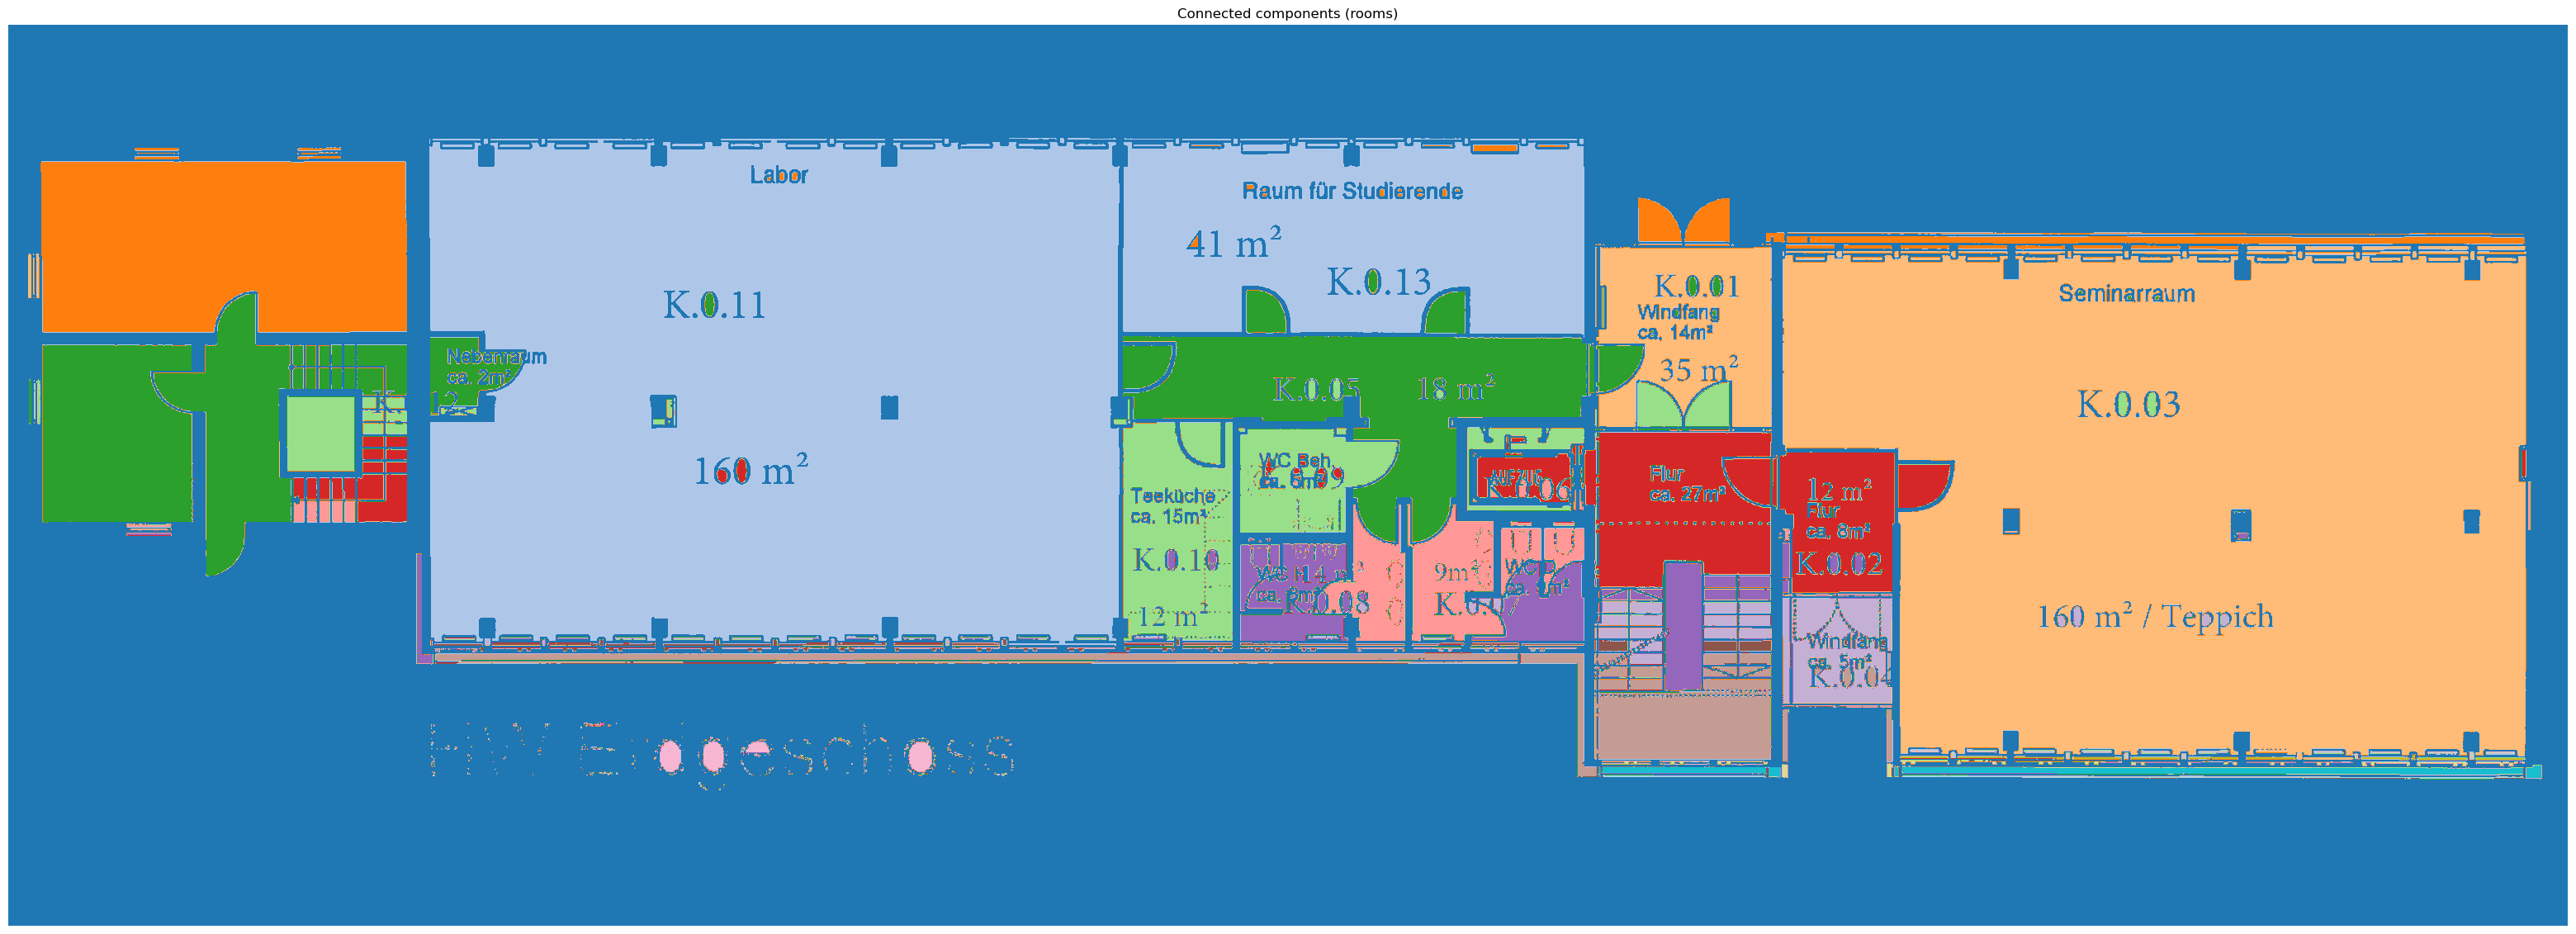

In [5]:
# Use connectedComponentsWithStats instead of connectedComponents
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
    bw, connectivity=8, ltype=cv2.CV_32S
)


plt.figure(figsize=(40, 30))
plt.imshow(labels, cmap="tab20")
plt.title("Connected components (rooms)")
plt.axis("off")
plt.show()


In [6]:
print("num_labels:", num_labels)        # how many components (incl. background)
print("labels shape:", labels.shape)    # same HxW as the image
print("stats shape:", stats.shape)      # one row per label
print("centroids shape:", centroids.shape)


num_labels: 981
labels shape: (1450, 4120)
stats shape: (981, 5)
centroids shape: (981, 2)


In [7]:
for label in range(1, num_labels):  # skip 0 = background
    x = stats[label, cv2.CC_STAT_LEFT]
    y = stats[label, cv2.CC_STAT_TOP]
    w = stats[label, cv2.CC_STAT_WIDTH]
    h = stats[label, cv2.CC_STAT_HEIGHT]
    area = stats[label, cv2.CC_STAT_AREA]
    cx, cy = centroids[label]

    print(f"Label {label}: bbox=({x},{y},{w},{h}), area={area}, centroid=({cx:.1f},{cy:.1f})")


Label 1: bbox=(0,0,4120,1450), area=2532016, centroid=(1981.2,818.5)
Label 2: bbox=(686,153,1805,4), area=4671, centroid=(1566.9,154.6)
Label 3: bbox=(655,154,26,20), area=448, centroid=(666.9,162.3)
Label 4: bbox=(2495,154,29,3), area=84, centroid=(2508.6,155.0)
Label 5: bbox=(2527,155,38,195), area=2161, centroid=(2555.1,226.1)
Label 6: bbox=(685,159,1805,12), area=18845, centroid=(1593.6,164.6)
Label 7: bbox=(2495,160,28,11), area=307, centroid=(2508.5,165.0)
Label 8: bbox=(1065,173,1,1), area=1, centroid=(1065.0,173.0)
Label 9: bbox=(1069,173,1,1), area=1, centroid=(1069.0,173.0)
Label 10: bbox=(1074,173,2,1), area=2, centroid=(1074.5,173.0)
Label 11: bbox=(1078,173,1,1), area=1, centroid=(1078.0,173.0)
Label 12: bbox=(1087,173,4,1), area=4, centroid=(1088.5,173.0)
Label 13: bbox=(1054,173,79,7), area=291, centroid=(1094.2,177.3)
Label 14: bbox=(1147,173,78,7), area=241, centroid=(1186.3,177.6)
Label 15: bbox=(1517,173,79,8), area=282, centroid=(1558.4,178.0)
Label 16: bbox=(1610,1

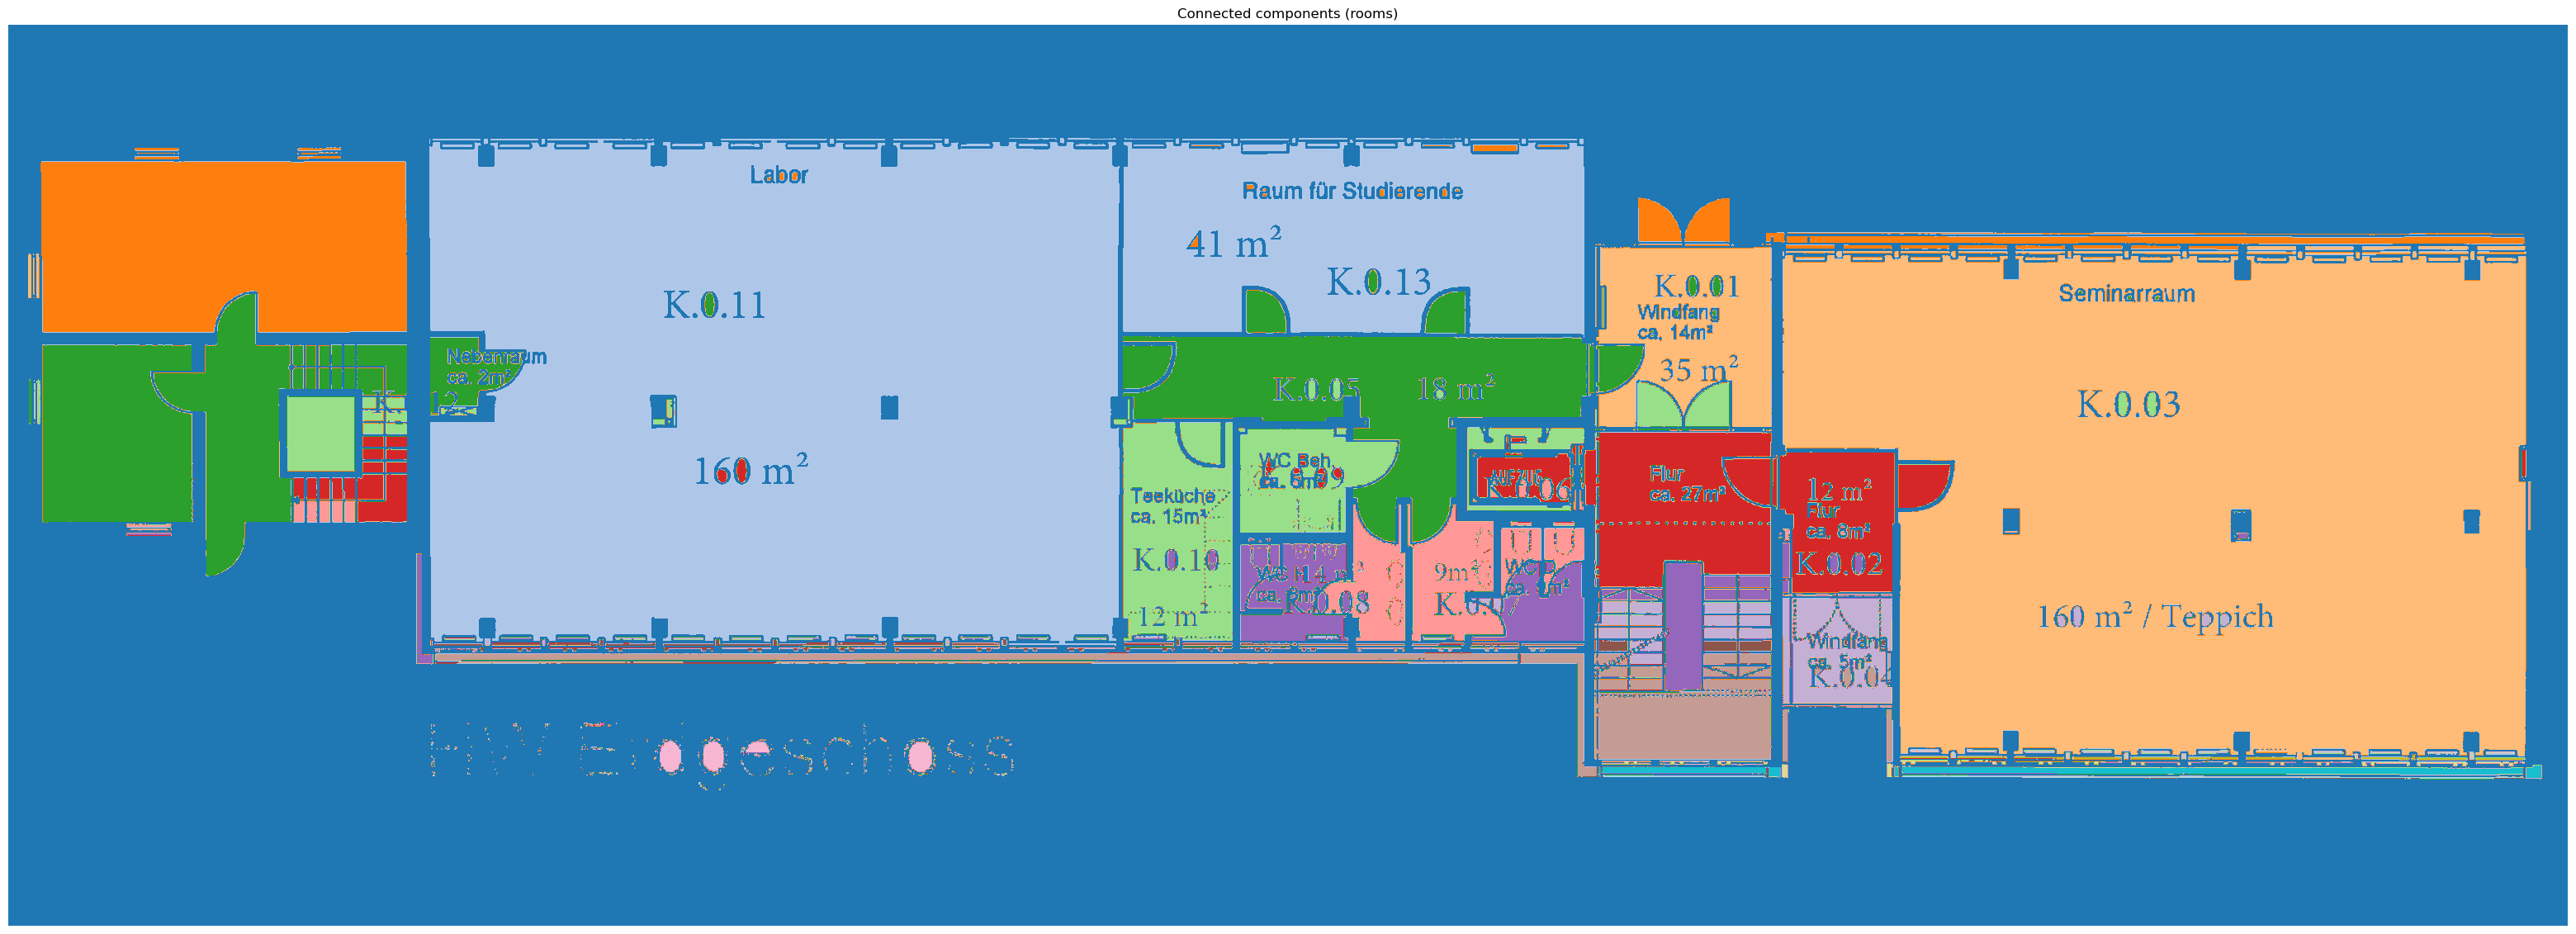

In [9]:
plt.figure(figsize=(40, 30))
plt.imshow(labels, cmap="tab20")
plt.title("Connected components (rooms)")
plt.axis("off")
plt.show()


In [22]:
min_area = 1500  # tune this for your image scale

rooms = []
for label in range(1, num_labels):
    x = stats[label, cv2.CC_STAT_LEFT]
    y = stats[label, cv2.CC_STAT_TOP]
    w = stats[label, cv2.CC_STAT_WIDTH]
    h = stats[label, cv2.CC_STAT_HEIGHT]
    area = stats[label, cv2.CC_STAT_AREA]
    cx, cy = centroids[label]

    if area < min_area:
        continue  # skip noise

    rooms.append({
        "label": label,
        "bbox": (x, y, w, h),
        "area": area,
        "centroid": (cx, cy),
    })

print("Detected rooms:", len(rooms))
for r in rooms:
    print(r)


Detected rooms: 57
{'label': 1, 'bbox': (0, 0, 4120, 1450), 'area': 2532016, 'centroid': (1981.2367552179765, 818.4707584786194)}
{'label': 2, 'bbox': (686, 153, 1805, 4), 'area': 4671, 'centroid': (1566.9145793192035, 154.6401198886748)}
{'label': 5, 'bbox': (2527, 155, 38, 195), 'area': 2161, 'centroid': (2555.119851920407, 226.0675613142064)}
{'label': 6, 'bbox': (685, 159, 1805, 12), 'area': 18845, 'centroid': (1593.625524011674, 164.5889625895463)}
{'label': 65, 'bbox': (677, 184, 1112, 816), 'area': 842436, 'centroid': (1244.0480903000346, 591.6225731094113)}
{'label': 78, 'bbox': (1794, 190, 743, 315), 'area': 200871, 'centroid': (2166.7313101443215, 343.72927401167914)}
{'label': 111, 'bbox': (52, 221, 590, 275), 'area': 157768, 'centroid': (346.33547360681507, 355.37889179047716)}
{'label': 125, 'bbox': (2623, 279, 71, 71), 'area': 3841, 'centroid': (2652.834418120281, 319.65191356417597)}
{'label': 126, 'bbox': (2698, 280, 73, 71), 'area': 3989, 'centroid': (2739.863624968663

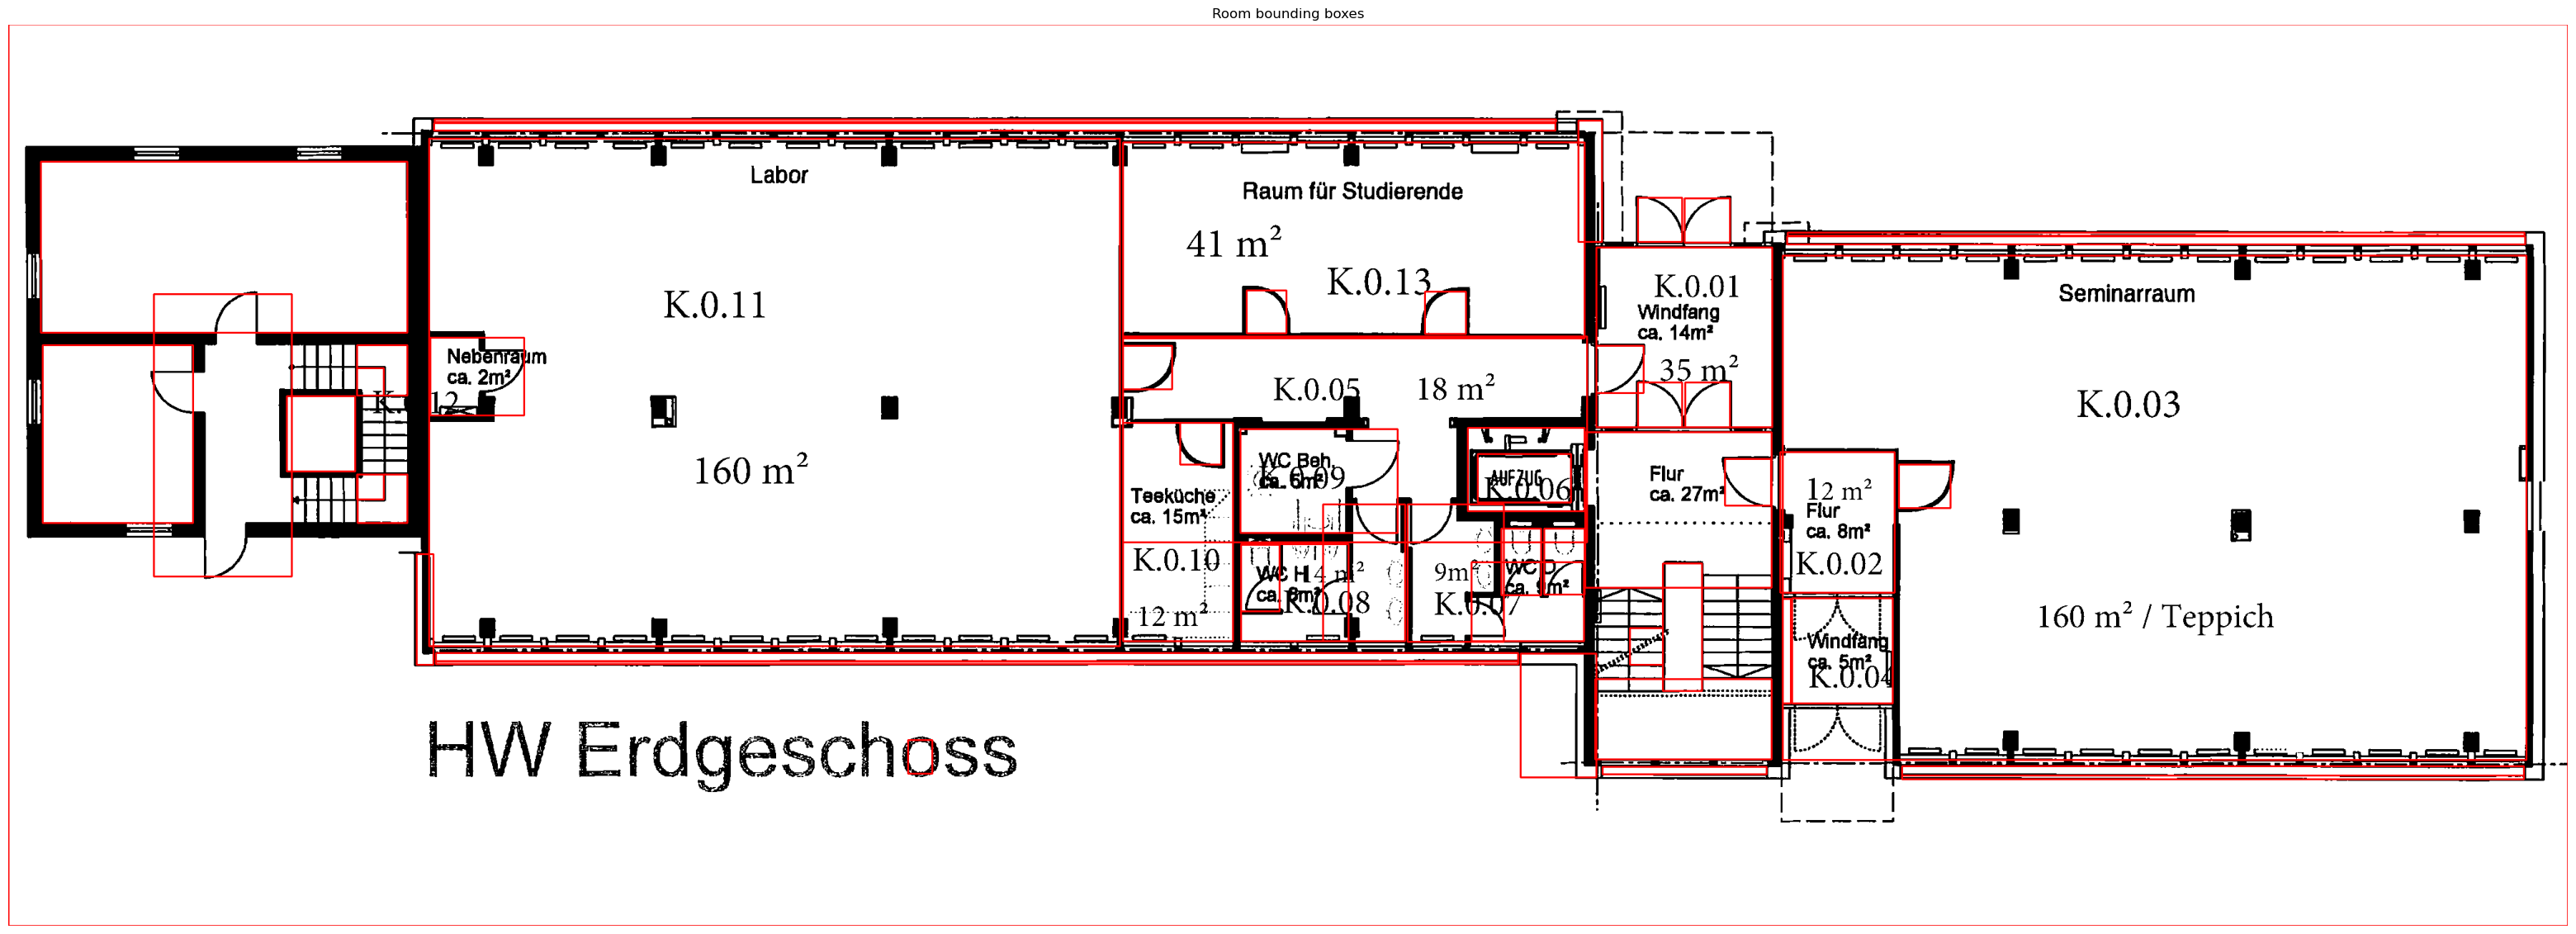

In [23]:
vis = cv2.cvtColor(bw, cv2.COLOR_GRAY2BGR)

for r in rooms:
    x, y, w, h = r["bbox"]
    cv2.rectangle(vis, (x, y), (x+w, y+h), (0, 0, 255), 2)

plt.figure(figsize=(40, 30))
plt.imshow(vis[..., ::-1])  # BGR->RGB
plt.axis("off")
plt.title("Room bounding boxes")
plt.show()


In [13]:
# starting from your grayscale 'img'
_, wall_bw = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# optional: close small gaps to get continuous walls
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
walls = cv2.morphologyEx(wall_bw, cv2.MORPH_CLOSE, kernel)


In [14]:
# Stronger closing to "seal" doors/windows
big_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
closed = cv2.morphologyEx(walls, cv2.MORPH_CLOSE, big_kernel)

# Difference between strongly-closed walls and original walls ~ potential openings
openings = cv2.subtract(closed, walls)


In [15]:
num_d, labels_d, stats_d, centroids_d = cv2.connectedComponentsWithStats(
    openings, connectivity=8, ltype=cv2.CV_32S
)

door_candidates = []
for i in range(1, num_d):
    area = stats_d[i, cv2.CC_STAT_AREA]
    if 50 < area < 2000:  # tune thresholds
        door_candidates.append(i)

print("door candidates:", len(door_candidates))


door candidates: 602


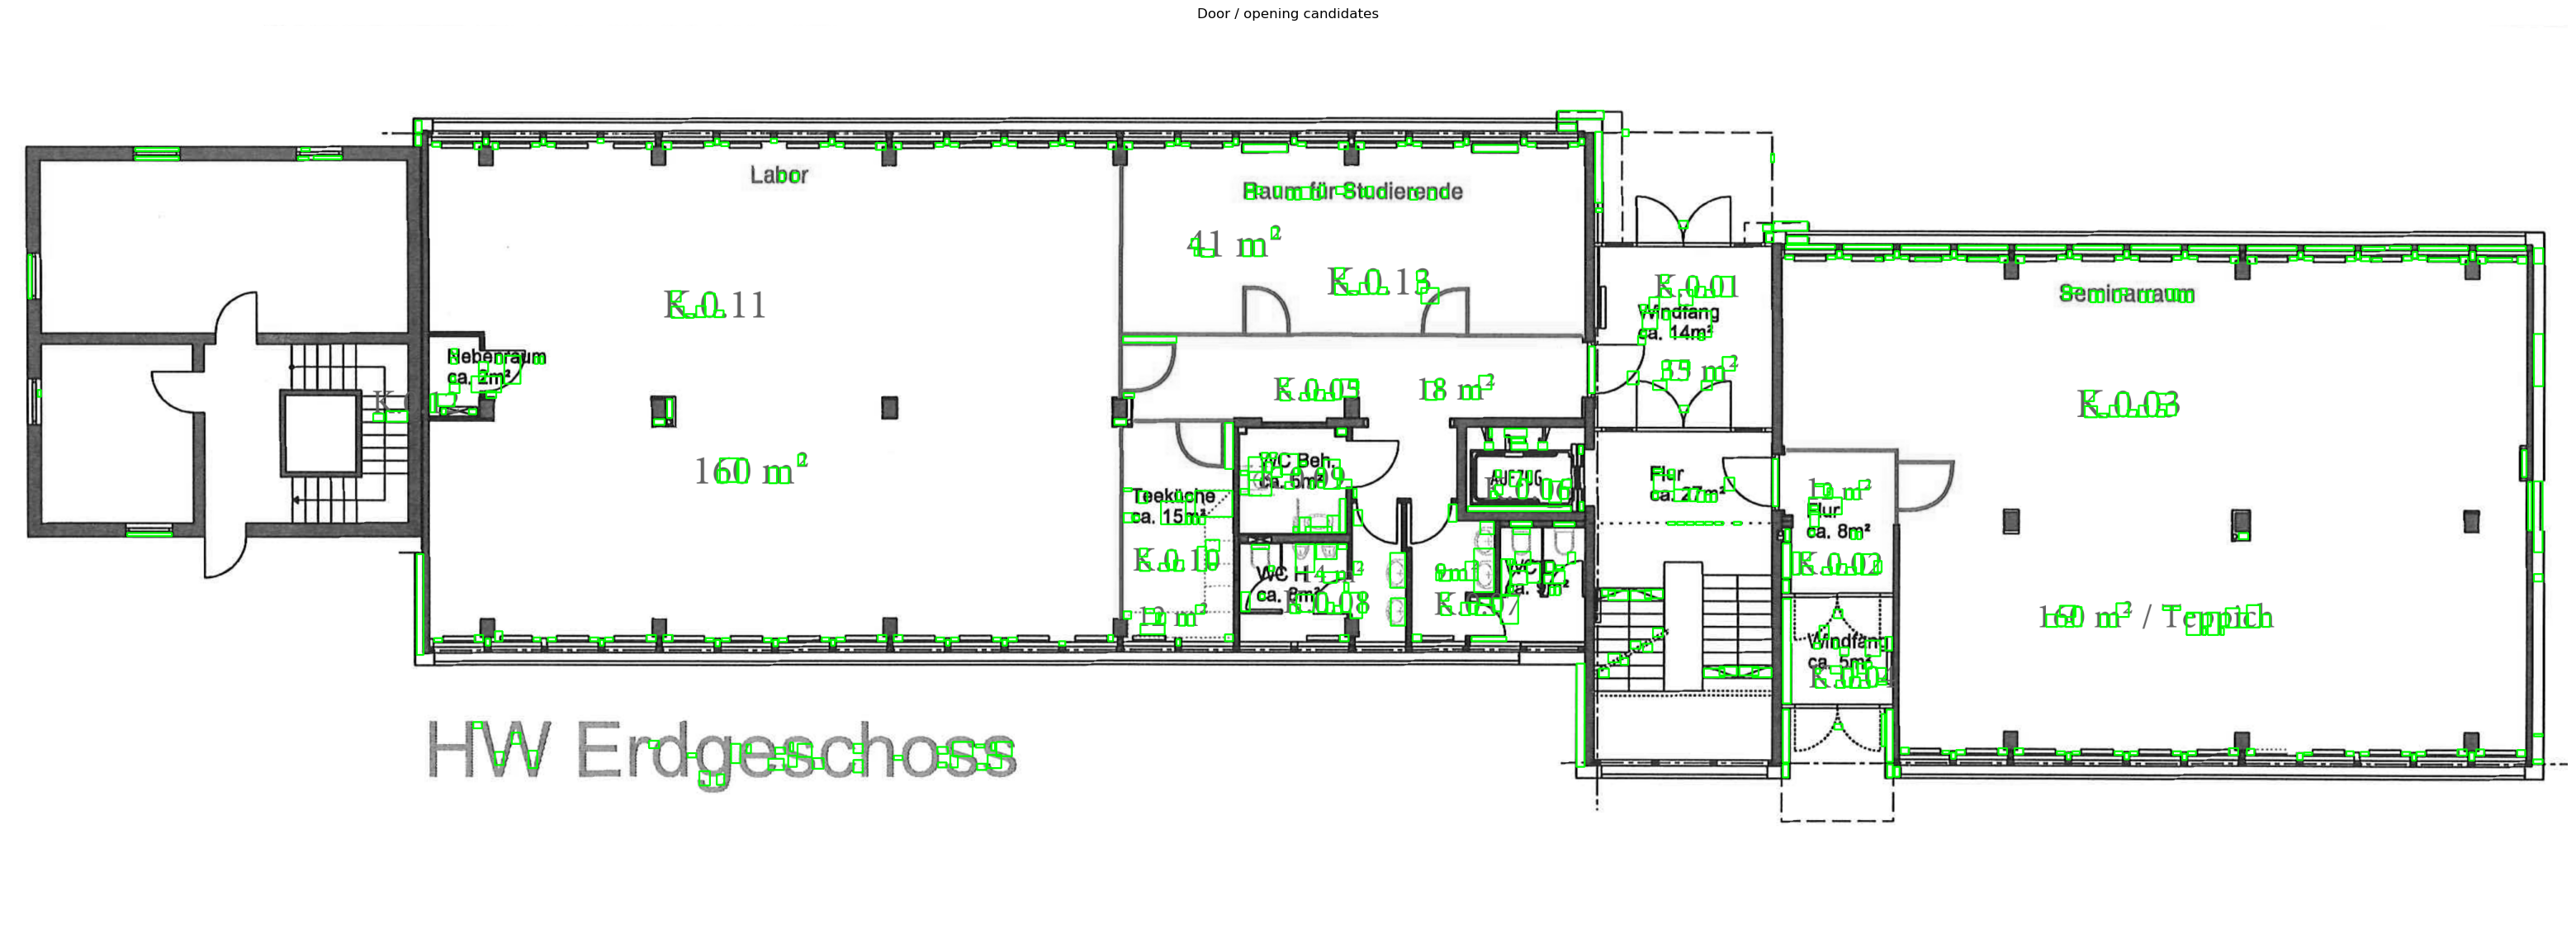

In [17]:
vis_doors = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for i in door_candidates:
    x = stats_d[i, cv2.CC_STAT_LEFT]
    y = stats_d[i, cv2.CC_STAT_TOP]
    w = stats_d[i, cv2.CC_STAT_WIDTH]
    h = stats_d[i, cv2.CC_STAT_HEIGHT]
    cv2.rectangle(vis_doors, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.figure(figsize=(40, 30))
plt.imshow(vis_doors[..., ::-1])
plt.axis("off")
plt.title("Door / opening candidates")
plt.show()
